<a href="https://colab.research.google.com/github/mansi05-t/Thera-Bank-Case/blob/master/Thera_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thera Bank Case

# Problem Statement
**Context:**

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

**Objective:**

The classification goal is to predict the likelihood of a liability customer buying personal loans.

In [ ]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
files = files.upload()

This is how our data looks like..

In [ ]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Information on the features or attributes

**The attributes can be divided accordingly :**


**The binary category have five variables as below:**

* Personal Loan - Did this customer accept the personal loan offered in the last campaign? **This is our target variable**

* Securities Account - Does the customer have a securities account with the bank?

* CD Account - Does the customer have a certificate of deposit (CD) account with the bank?

* Online - Does the customer use internet banking facilities?

* Credit Card - Does the customer use a credit card issued by UniversalBank?


**Interval variables are as below:**

* Age - Age of the customer

* Experience - Years of experience

* Income - Annual income in dollars

* CCAvg - Average credit card spending

* Mortage - Value of House Mortgage


**Ordinal Categorical Variables are:**

* Family - Family size of the customer

* Education - education level of the customer

**The nominal variable is :**

* ID

* Zip Code

**General information of our data is given below:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

There are no null values in our data.

In [ ]:
df.shape

(5000, 14)

There are 5000 rows and 14 features in our dataset.

**To get basic statistical information from the dataset we can use below pandas function.**

In [ ]:
df.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Age ranges from 23 to 67.

Minimum income is 8,000 dollars, while the maximum income is 224,000 dollars.

We can see that minimum experience is -3, which is unexpected.Let's check..



In [ ]:
# Customers with negative experience
df[df['Experience'] < 0].head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


The Age group with negative values in 'Experience' is small(most customers are in their early 20's).


In [ ]:
#Total no. of customers with negative experience
(df['Experience'] < 0).sum()

52

There are 52 values where Experience is negative and it can affect our annalysis.

We can replace all these values with it's mean or median. But from the above table we can see that mean is around 20 and so is the age for all these 52 customers. 

So, converting negative values to mean will skew the data. Hence, it's better to remove such values.


In [ ]:
df1 = df[df['Experience'] > 0]

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4882.0,2496.172061,1439.377900,1.0,1254.25,2490.5,3735.75,5000.0
Age,4882.0,45.826506,11.155088,25.0,36.00,46.0,55.00,67.0
Experience,4882.0,20.605899,11.136704,1.0,11.00,21.0,30.00,43.0
Income,4882.0,73.870750,46.112752,8.0,39.00,64.0,98.00,224.0
ZIP Code,4882.0,93150.227366,2130.612121,9307.0,91910.25,93437.0,94608.00,96651.0
Family,4882.0,2.386112,1.148222,1.0,1.00,2.0,3.00,4.0
CCAvg,4882.0,1.935412,1.745065,0.0,0.70,1.5,2.60,10.0
Education,4882.0,1.874846,0.839329,1.0,1.00,2.0,3.00,3.0
Mortgage,4882.0,56.844326,102.009136,0.0,0.00,0.0,101.75,635.0
Personal Loan,4882.0,0.096887,0.295833,0.0,0.00,0.0,0.00,1.0


Now, We can see that the minimum experience is 1.

The minimum age has also been changed to 25.

# Some Visualizations

**Influence of Securities account on Personal Loan**

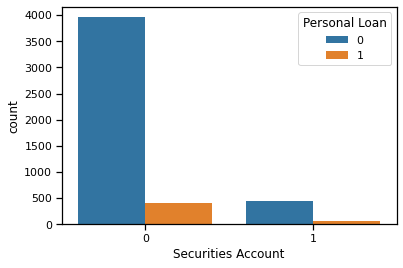

In [ ]:
sns.countplot(x="Securities Account", data=df1,hue="Personal Loan")
plt.show()

Majority of customers who does not have loan have securities account


**Distributions of Personal Loan among group of Education**

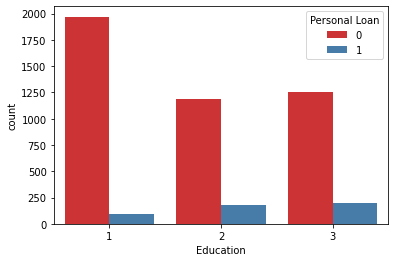

In [ ]:
sns.countplot(x='Education',data=df1,hue='Personal Loan',palette='Set1')
plt.show()

Education level does not have much impact on personal loan. But it seems customers with Education level 2 and 3 are more likely to take loan.

**Distributions of personal loans among groups of CD Account**

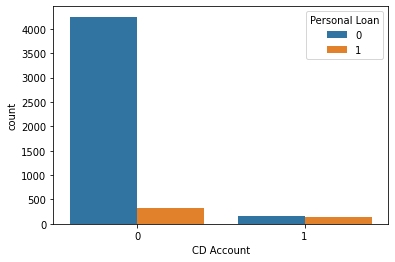

In [ ]:
sns.countplot(x='CD Account',data=df1,hue='Personal Loan')
plt.show()

Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

# Impact of Income and Education on Personal Loan

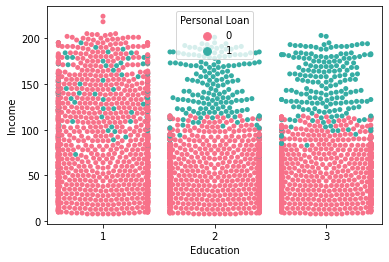

In [ ]:
sns.swarmplot(x='Education',y='Income',hue='Personal Loan',data=df1, palette= 'husl')
plt.show()

Customers with higher income are tend to take loans.

Customers whose education level is 1 is having more income.

Customers with Education level 2 and 3 plus higher income has taken more loan.

# Influence of Personal loan  in terms of Family and Mortgage

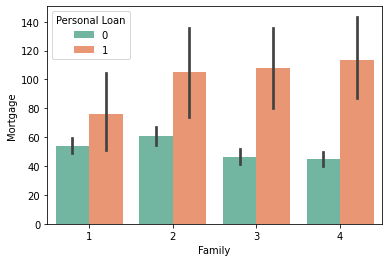

In [ ]:
sns.barplot(x="Family", y='Mortgage', hue="Personal Loan", data=df1, palette="Set2")
plt.show()

Family of 3 and 4 has higher mortgage and are more likely to take loan.

# Analysis of the numerical values with a categorical Personal Loan

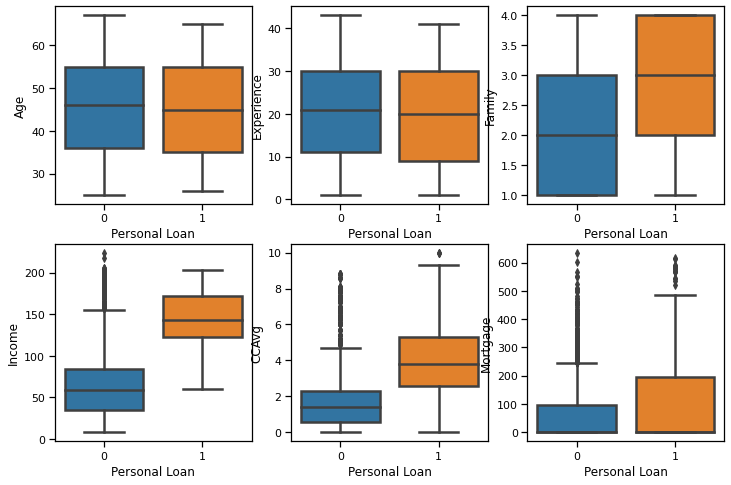

<Figure size 432x288 with 0 Axes>

In [ ]:
numerical = ['Age' , 'Experience' ,'Family' ,'Income' , 'CCAvg' , 'Mortgage']
fig, ax = plt.subplots(2, 3, figsize=(12,8))
for var, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x='Personal Loan', y=var, data=df1, ax=subplot)
plt.show()
plt.clf()

Age of the customer is not a defining factor if the person will accept a personal loan or not.

Professional years of experience also not a governing factor.

As we saw in the previous graph, a family of 3 or 4 are more likely to take Loan.

As expected, higher the income more is the chance that a person will accept a personal loan.

If one's credit card average spending per month is higher, they will probably accept a personal loan offer.

Higher mortgage means a customer might accept a personal loan offer.

# Heatmap 

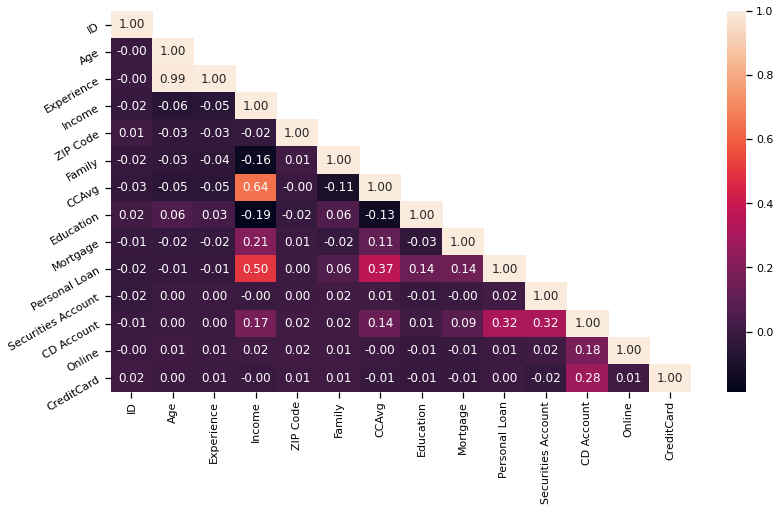

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df1.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Age and Experience are highly correlated

Income and CCAvg are moderately correlated

Personal loan and Income are also positively correlated.



# Target column distribution
Our target variable is Personal Loan

In [ ]:
df1["Personal Loan"].value_counts()

0    4409
1     473
Name: Personal Loan, dtype: int64

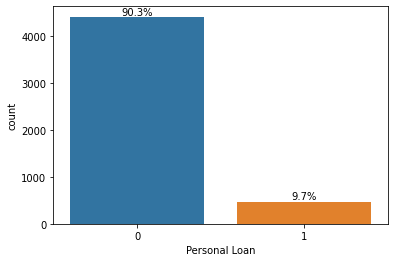

In [ ]:
ax = sns.countplot(data=df1,x='Personal Loan')
a = df1["Personal Loan"]
ncount = len(a)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')

plt.show()

As we can see, that only 473 (i.e.) 9% of customers have personal loan.

# Splitting the data into train and test

The variables ID and ZIP Code does not add any interesting information. There is no association between a person's customer ID, ZIP Code and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

In [ ]:
from sklearn.model_selection import train_test_split

X = df1.drop(["ZIP Code", "ID", "Personal Loan"] , axis = 1)
y=df1[['Personal Loan']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3417, 11) (3417, 1)
(1465, 11) (1465, 1)


# Classification Models

**Logistic Regression**

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1334
           1       0.80      0.63      0.70       131

    accuracy                           0.95      1465
   macro avg       0.88      0.81      0.84      1465
weighted avg       0.95      0.95      0.95      1465

0.952901023890785


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
logreg.predict_proba(X_train)

array([[9.72574023e-01, 2.74259775e-02],
       [9.99593509e-01, 4.06490911e-04],
       [9.99253896e-01, 7.46103847e-04],
       ...,
       [7.72666594e-01, 2.27333406e-01],
       [9.99819692e-01, 1.80307529e-04],
       [9.73339180e-01, 2.66608198e-02]])

In [ ]:
y_predictProb = logreg.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve is = " ,roc_auc)

Area under the ROC curve is =  0.9533086102790852


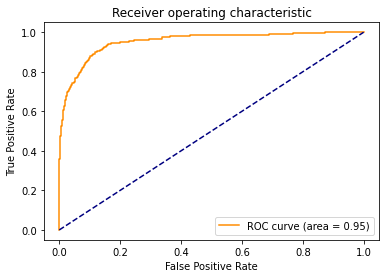

In [ ]:
# Plotting the Area under ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Here we have a classification report which consists of a precision, recall, f1-score & support, also the accuracy_score.

But how to determine if our model has done well? 

* Well, first we look at the accuracy which is 95% and it's not a small thing, but we know from the data that the number of buyer’s percentage to the non-buyer percentage is very less. 

* Hence accuracy didn’t play a big role in determining how our model performed.

# Standardization

Standardization is a transformation that centers the data by removing the mean value of each feature and then scale it by dividing (non-constant) features by their standard deviation.

After standardizing data the mean will be zero and the standard deviation one.


Data Z is rescaled such that μ = 0 and 𝛔 = 1, and is done through this **formula:**

z=x-μ/𝛔

In [ ]:
#from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
col_names = df1.columns
scaler = preprocessing.StandardScaler()
s_X_train = scaler.fit_transform(X_train)
s_X_test = scaler.fit_transform(X_test)

**Logistic Regresssion after Standardization**

In [ ]:
logreg = LogisticRegression()
logreg.fit(s_X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(s_X_test)
print(classification_report(y_test,y_pred))
l = accuracy_score(y_test,y_pred)
print(l)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1334
           1       0.76      0.68      0.72       131

    accuracy                           0.95      1465
   macro avg       0.86      0.83      0.85      1465
weighted avg       0.95      0.95      0.95      1465

0.9522184300341296


In [ ]:
y_predictProb = logreg.predict_proba(s_X_test)
fpr1, tpr1, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve is = " ,roc_auc1)

Area under the ROC curve is =  0.9629765270036738


We get the accuracy of 95% in both the cases.

The area under the curve is around 96%.

We get a recall value of 68%, which means our model did much better in predicting True Positives

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(s_X_train, y_train)
y_pred = model_naive.predict(s_X_test)
print(classification_report(y_test,y_pred))
n = accuracy_score(y_test,y_pred)
print(n)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1334
           1       0.44      0.62      0.52       131

    accuracy                           0.90      1465
   macro avg       0.70      0.77      0.73      1465
weighted avg       0.91      0.90      0.90      1465

0.8962457337883959


In [ ]:
y_predictProb = model_naive.predict_proba(s_X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve is = " ,roc_auc)

Area under the ROC curve is =  0.9312862652643144


We got an accuracy score of around 90% with a recall value of 62% which is much less as compared to the Logistic Regression.

Also, the area under the curve is around 93%, less than the logistic regression one.

Hence Naive Bayes terms out to be not a good classifier with this particular dataset.

**K-Nearest Neighbour**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(s_X_train, y_train)
y_pred = knn.predict(s_X_test)
print(classification_report(y_test,y_pred))
k = accuracy_score(y_test,y_pred)
print(k)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1334
           1       0.93      0.65      0.77       131

    accuracy                           0.96      1465
   macro avg       0.95      0.82      0.87      1465
weighted avg       0.96      0.96      0.96      1465

0.9645051194539249


In [ ]:
y_predictProb = knn.predict_proba(s_X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[::,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve is = " ,roc_auc)

Area under the ROC curve is =  0.9446335992309188


We got 96% accuracy in determining if a customer will buy personal loan or not.

Also the reacll value is 65% and Area under the Curve is 94%.

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d_model=DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
d_model.fit(s_X_train,y_train)
y_pred = d_model.predict(s_X_test)
print(classification_report(y_test,y_pred))
d = accuracy_score(y_test,y_pred)
print(d)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1334
           1       0.97      0.89      0.93       131

    accuracy                           0.99      1465
   macro avg       0.98      0.95      0.96      1465
weighted avg       0.99      0.99      0.99      1465

0.9877133105802047


In [ ]:
y_predictProb = d_model.predict_proba(s_X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve is = " ,roc_auc)

Area under the ROC curve is =  0.9965408517115488


We got a approx 99% accuracy score while 89% recall value .

Area under the curve is around 99%.

**Random Forrest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(criterion='gini', n_estimators=150 ,max_depth=3, max_features = None, oob_score=True)
randomforest_model.fit(s_X_train,y_train) 
print("The out of bag score is", randomforest_model.oob_score_)
y_pred = randomforest_model.predict(s_X_test)
print(classification_report(y_test,y_pred))
r = accuracy_score(y_test,y_pred)
print(r)

The out of bag score is 0.9786362306116476
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1334
           1       0.97      0.89      0.93       131

    accuracy                           0.99      1465
   macro avg       0.98      0.95      0.96      1465
weighted avg       0.99      0.99      0.99      1465

0.9883959044368601


In [ ]:
y_predictProb = randomforest_model.predict_proba(s_X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predictProb[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve is = " ,roc_auc)

Area under the ROC curve is =  0.9977597079322934


We got Accuracy around 99% with recall as 89% and auc as 99% which is same as decision tree.

# Confusion Matrix for all the models

In [ ]:
from sklearn import metrics

Logistic_pred = logreg.predict(s_X_test)
Logistic = metrics.confusion_matrix(Logistic_pred, y_test)

RF = metrics.confusion_matrix(y_test, randomforest_model.predict(s_X_test))

dt_pred = d_model.predict(s_X_test)
DT = metrics.confusion_matrix(dt_pred, y_test)

KNN = metrics.confusion_matrix(y_test, knn.predict(s_X_test))

Naive_pred = model_naive.predict(s_X_test)
Naive = metrics.confusion_matrix(Naive_pred, y_test)

print("Confusion matrix for Logistic Regression = \n", Logistic,"\n")
print("Confusion matrix for Naive Bayes = \n", Naive,"\n")
print("Confusion matrix for K Nearest Neighbour = \n", KNN, "\n")
print("Confusion matrix for Decision Tree = \n", DT,"\n")
print("Confusion matrix for Random Forest = \n", RF , "\n")

Confusion matrix for Logistic Regression = 
 [[1306   42]
 [  28   89]] 

Confusion matrix for Naive Bayes = 
 [[1232   50]
 [ 102   81]] 

Confusion matrix for K Nearest Neighbour = 
 [[1328    6]
 [  46   85]] 

Confusion matrix for Decision Tree = 
 [[1279    1]
 [  55  130]] 

Confusion matrix for Random Forest = 
 [[1331    3]
 [  14  117]] 



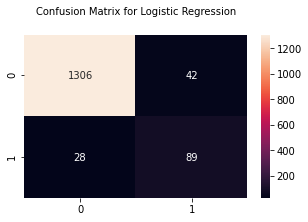

In [ ]:
#Confusion matrix usin heatmap
plt.subplots(figsize = (5,3))
sns.heatmap(metrics.confusion_matrix(Logistic_pred, y_test), annot = True,fmt ='g')
plt.title("Confusion Matrix for Logistic Regression", fontsize = 10,loc = 'center', pad = 20)
plt.show()

# Comparison among the above models

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes' , 'KNN' ,'Decision Tree', 'Random Forest'],
    'Score': [l,n,k,d,r]})
result_df = results.sort_values(by='Score', ascending=False)
result_df.head()

,Model,Score
4,Random Forest,0.988396
3,Decision Tree,0.987713
2,KNN,0.964505
0,Logistic Regression,0.952218
1,Naive Bayes,0.896246


We can see tha Random Forest has performed better.
Let's check it's important features..

#Feature Importance


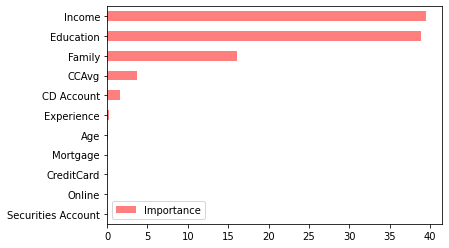

In [ ]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r',alpha = 0.5 )
plt.show()

In [ ]:
labeles=df1['Personal Loan']
features=df1[['Education', 'Income', 'Family', 'CCAvg','CD Account']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labeles, test_size=0.3,random_state=5 )

In [ ]:
col_names = df1.columns
scaler = preprocessing.StandardScaler()
s_X_train = scaler.fit_transform(X_train)
s_X_test = scaler.fit_transform(X_test)

In [ ]:
randomforest_model = RandomForestClassifier(criterion='gini', n_estimators=150 ,max_depth=3, max_features = None, oob_score=True)
randomforest_model.fit(s_X_train,y_train) 
print("The out of bag score is", randomforest_model.oob_score_)
y_pred = randomforest_model.predict(s_X_test)
print(classification_report(y_test,y_pred))
r = accuracy_score(y_test,y_pred)
print(r)

The out of bag score is 0.9815627743634767
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1319
           1       0.98      0.86      0.92       146

    accuracy                           0.98      1465
   macro avg       0.98      0.93      0.95      1465
weighted avg       0.98      0.98      0.98      1465

0.9843003412969283


# K-fold Validation

We are going to use a k-fold validation to evaluate each algorithm.

We’ll use a 10-fold cross validation.

In [ ]:
from sklearn import model_selection
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: Mean = %f STD = (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: Mean = 0.948382 STD = (0.007318)
NB: Mean = 0.883452 STD = (0.010092)
KNN: Mean = 0.911920 STD = (0.008889)
CART: Mean = 0.984227 STD = (0.004854)
RF: Mean = 0.988530 STD = (0.003199)


From the above, it looks like the Random Forest, Decision Tree and Logistic Regression methods are providing the best results (based on the ‘mean’ values).

# Visualizing the best Model

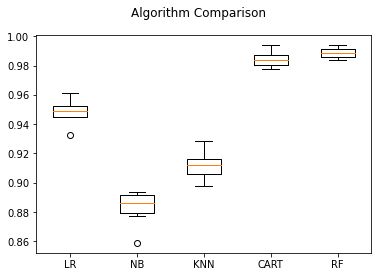

In [ ]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From these results, we can see that Random forest is doing a better job.

It's beacause of the following reasons: 

* Random Forest is capable of handling all the binary, categorical, and numerical features. 

* There is very little pre-processing that needs to be done. The data does not need to be rescaled or transformed.

* Random forest improves on bagging because it decorrelates the trees with the introduction of splitting on a random subset of features. This means that at each split of the tree, the model considers only a small subset of features rather than all of the features of the model.

* Each decision tree has a high variance, but low bias. But because we average all the trees in random forest, we are averaging the variance as well so that we have a low bias and moderate variance model.

* Random forest handles outliers by essentially binning them.
